In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
df = pd.read_csv("../data/Canada_Gravity_2018.csv", comment='/')

In [4]:
df.head(3)

,X,Y,ADJG,B_ERR,BOUGUER,COORD_ERR,DAY,DEPTH,DEPTH_ERR,DEPTH_TYPE,...,FREEAIR,G_ERR,PROJ,STATUS,STN,STN_TYPE,TC,TC_ERR,TIME,dummy
0,-63.961270,30.470851,979342.46,0.0,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,...,-19.41,5.0,1970702,1,501662,21,0.0,0.0,618,NaN
1,-63.961571,30.454652,979344.38,0.0,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,...,-16.21,5.0,1970702,1,501667,21,0.0,0.0,623,NaN
2,-63.961770,30.438452,979344.20,0.0,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,...,-15.11,5.0,1970702,1,501672,21,0.0,0.0,628,NaN


In [5]:
xy = df[['X', 'Y']].values

In [6]:
number_of_points = xy.shape[0]
number_of_points / 1e5

7.16957

Text(0, 0.5, 'Latitude')

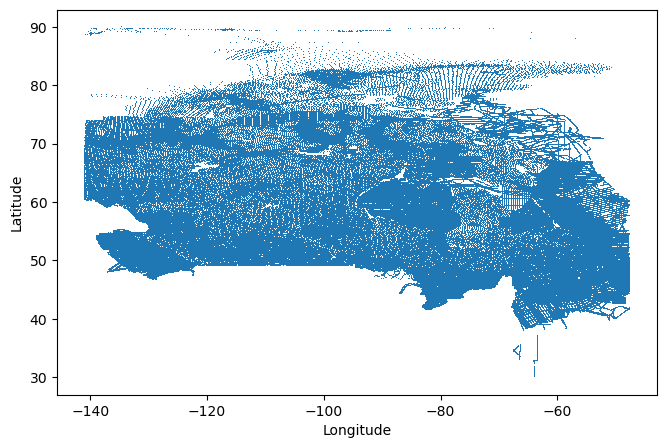

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.plot(xy[:,0], xy[:,1], ',')
ax.set_aspect(1)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

In [8]:
gdf = gpd.read_file("../data/canadian-shield_1266.geojson")

In [16]:
from ipywidgets import widgets, interact
names = list(df.keys() )

In [40]:
inds = df['BOUGUER'].values<2000.

In [47]:
nskip = 1
def foo(name):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    out = ax.scatter(
        xy[inds,0][::nskip], xy[inds,1][::nskip], s=1, c=df[name].values[inds][::nskip], 
        cmap='turbo', vmin=-215.6, vmax=242.6
    )
    gdf.boundary.plot(ax=ax, color='red')
    plt.colorbar(out)
    ax.set_aspect(1)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(name)
    
interact(foo, name=widgets.Select(options=names, value='BOUGUER'))

interactive(children=(Select(description='name', index=4, options=('X', 'Y', 'ADJG', 'B_ERR', 'BOUGUER', 'COOR…

<function __main__.foo(name)>

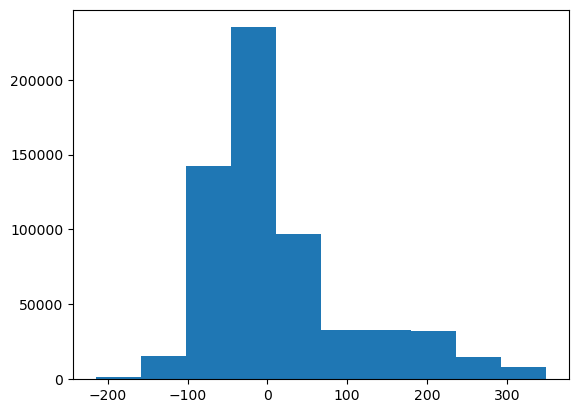

In [38]:
out = plt.hist(df['BOUGUER'].values[df['BOUGUER'].values<2000.])

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
out = ax.scatter(xy[::nskip,0], xy[::nskip,1], s=1, c=df[name].values[::nskip])
gdf.boundary.plot(ax=ax, color='red')
plt.colorbar(out)
ax.set_aspect(1)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(name)


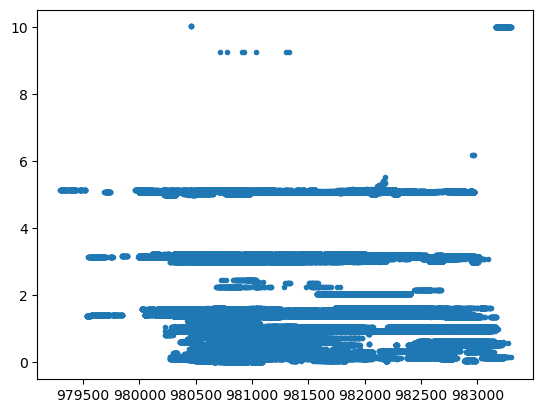

In [34]:
# plt.plot(df['ADJG'].values-df['FA_ERR'].values, df['Y'].values)
plt.plot(df['ADJG'].values, df['FA_ERR'].values, '.')
# plt.plot(df['FREEAIR'].values, df['Y'].values)

In [ ]:
widgets.RadioButtons?

['X',
 'Y',
 'ADJG',
 'B_ERR',
 'BOUGUER',
 'COORD_ERR',
 'DAY',
 'DEPTH',
 'DEPTH_ERR',
 'DEPTH_TYPE',
 'ELEV',
 'ELEV_ERR',
 'FA_ERR',
 'FREEAIR',
 'G_ERR',
 'PROJ',
 'STATUS',
 'STN',
 'STN_TYPE',
 'TC',
 'TC_ERR',
 'TIME',
 'Unnamed: 22']

In [1]:
def get_normal_gravity(phi, e, k, gamma_e):
    phi = np.
    gamma_phi = gamma_e * (1+k*np.sin(phi)**2) / (np.sqrt(1-e**2*np.sin(phi)**2))
    return gamma_phi

In [ ]:
get_normal_gravity()

In [3]:
df.head(3)

,X,Y,ADJG,B_ERR,BOUGUER,COORD_ERR,DAY,DEPTH,DEPTH_ERR,DEPTH_TYPE,...,FA_ERR,FREEAIR,G_ERR,PROJ,STATUS,STN,STN_TYPE,TC,TC_ERR,TIME
-63.961270,30.470851,979342.46,0.0,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,0.0,...,-19.41,5.0,1970702,1,501662,21,0.0,0.0,618,NaN
-63.961571,30.454652,979344.38,0.0,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,0.0,...,-16.21,5.0,1970702,1,501667,21,0.0,0.0,623,NaN
-63.961770,30.438452,979344.20,0.0,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,0.0,...,-15.11,5.0,1970702,1,501672,21,0.0,0.0,628,NaN


In [3]:
df.shape

(716957, 22)

In [4]:
header ='X,Y,ADJG,B_ERR,BOUGUER,COORD_ERR,DAY,DEPTH,DEPTH_ERR,DEPTH_TYPE,ELEV,ELEV_ERR,FA_ERR,FREEAIR,G_ERR,PROJ,STATUS,STN,STN_TYPE,TC,TC_ERR,TIM'.split(',')

In [5]:
df.head(3)

,X,Y,ADJG,B_ERR,BOUGUER,COORD_ERR,DAY,DEPTH,DEPTH_ERR,DEPTH_TYPE,...,FA_ERR,FREEAIR,G_ERR,PROJ,STATUS,STN,STN_TYPE,TC,TC_ERR,TIME
-63.961270,30.470851,979342.46,0.0,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,0.0,...,-19.41,5.0,1970702,1,501662,21,0.0,0.0,618,NaN
-63.961571,30.454652,979344.38,0.0,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,0.0,...,-16.21,5.0,1970702,1,501667,21,0.0,0.0,623,NaN
-63.961770,30.438452,979344.20,0.0,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,0.0,...,-15.11,5.0,1970702,1,501672,21,0.0,0.0,628,NaN


In [11]:
len(header)

22

In [12]:
df

,X,Y,ADJG,B_ERR,BOUGUER,COORD_ERR,DAY,DEPTH,DEPTH_ERR,DEPTH_TYPE,...,FA_ERR,FREEAIR,G_ERR,PROJ,STATUS,STN,STN_TYPE,TC,TC_ERR,TIME
-63.961270,30.470851,979342.46,0.00,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,0.0,...,-19.41,5.0,1970702,1,501662,21,0.0,0.0,618,NaN
-63.961571,30.454652,979344.38,0.00,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,0.0,...,-16.21,5.0,1970702,1,501667,21,0.0,0.0,623,NaN
-63.961770,30.438452,979344.20,0.00,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,0.0,...,-15.11,5.0,1970702,1,501672,21,0.0,0.0,628,NaN
-63.961972,30.422253,979346.25,0.00,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,0.0,...,-11.79,5.0,1970702,1,501677,21,0.0,0.0,633,NaN
-63.962170,30.406053,979344.43,0.00,9999.99,1000.0,17-JAN-1970,0.0,0.0,0,0.0,...,-12.33,5.0,1970702,1,501682,21,0.0,0.0,638,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-88.761157,89.248049,983221.40,10.59,177.70,100.0,01-JAN-1901,2525.0,50.5,5,0.3,...,3.75,10.0,1979104,1,4154,24,0.0,0.0,0,NaN
-89.318858,89.246381,983221.10,10.59,177.67,100.0,01-JAN-1901,2528.9,50.6,5,0.3,...,3.46,10.0,1979104,1,4155,24,0.0,0.0,0,NaN
-64.583377,88.932935,983186.20,4.01,168.24,400.0,16-APR-1969,2886.8,57.7,5,0.0,...,-30.63,0.5,1969105,1,4017,24,0.0,0.0,704,NaN
-56.980008,88.001144,983267.80,1.75,138.02,400.0,16-APR-1969,1197.9,24.0,5,0.0,...,55.50,0.5,1969105,1,4018,24,0.0,0.0,830,NaN
